In [1]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'http://openapi.seoul.go.kr:8088/6445776e7562696b3437517272436e/json/CardSubwayTime/1/1000/202111'

In [3]:
response = urllib.request.urlopen('http://openapi.seoul.go.kr:8088/6445776e7562696b3437517272436e/json/CardSubwayTime/1/1000/202111') 
json_str = response.read().decode("utf-8")

In [4]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayTime': {'list_total_count': 609,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_MON': '202111',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'FOUR_RIDE_NUM': 630.0,
    'FOUR_ALIGHT_NUM': 11.0,
    'FIVE_RIDE_NUM': 8985.0,
    'FIVE_ALIGHT_NUM': 7058.0,
    'SIX_RIDE_NUM': 12028.0,
    'SIX_ALIGHT_NUM': 40803.0,
    'SEVEN_RIDE_NUM': 36492.0,
    'SEVEN_ALIGHT_NUM': 93181.0,
    'EIGHT_RIDE_NUM': 61857.0,
    'EIGHT_ALIGHT_NUM': 196998.0,
    'NINE_RIDE_NUM': 48518.0,
    'NINE_ALIGHT_NUM': 131911.0,
    'TEN_RIDE_NUM': 49785.0,
    'TEN_ALIGHT_NUM': 67104.0,
    'ELEVEN_RIDE_NUM': 57296.0,
    'ELEVEN_ALIGHT_NUM': 57503.0,
    'TWELVE_RIDE_NUM': 67212.0,
    'TWELVE_ALIGHT_NUM': 64828.0,
    'THIRTEEN_RIDE_NUM': 68923.0,
    'THIRTEEN_ALIGHT_NUM': 62027.0,
    'FOURTEEN_RIDE_NUM': 59146.0,
    'FOURTEEN_ALIGHT_NUM': 58165.0,
    'FIFTEEN_RIDE_NUM': 78671.0,
    'FIFTEEN_ALIGHT_NUM': 61463.0,
    'SIXTEEN_RIDE_NUM': 88156.0,
    'SIXTEEN_A

In [6]:
df=pd.json_normalize(json_object['CardSubwayTime']['row'])
df

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,202111,1호선,서울역,630.0,11.0,8985.0,7058.0,12028.0,40803.0,36492.0,...,12360.0,101.0,1257.0,1.0,3.0,2.0,2.0,0.0,0.0,20211203
1,202111,1호선,동묘앞,141.0,1.0,2570.0,907.0,3387.0,4074.0,5711.0,...,2974.0,8.0,2017.0,0.0,2.0,0.0,0.0,0.0,0.0,20211203
2,202111,1호선,시청,30.0,0.0,2006.0,4859.0,2980.0,19785.0,6504.0,...,2196.0,65.0,309.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
3,202111,1호선,종각,118.0,1.0,2639.0,3960.0,3158.0,20401.0,5614.0,...,2786.0,212.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
4,202111,1호선,종로3가,223.0,21.0,3177.0,3136.0,3328.0,12386.0,4372.0,...,3463.0,135.0,914.0,0.0,1.0,1.0,0.0,0.0,0.0,20211203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,202111,중앙선,오빈,6.0,0.0,227.0,0.0,446.0,252.0,942.0,...,300.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
605,202111,중앙선,양평,53.0,2.0,1337.0,98.0,3102.0,2357.0,5853.0,...,2619.0,13.0,197.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
606,202111,중앙선,원덕,62.0,0.0,309.0,2.0,677.0,155.0,669.0,...,309.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203
607,202111,중앙선,용문,384.0,1.0,994.0,5.0,1966.0,649.0,2930.0,...,1188.0,0.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,20211203


In [7]:
df.columns

Index(['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'FOUR_RIDE_NUM', 'FOUR_ALIGHT_NUM',
       'FIVE_RIDE_NUM', 'FIVE_ALIGHT_NUM', 'SIX_RIDE_NUM', 'SIX_ALIGHT_NUM',
       'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM',
       'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM', 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM',
       'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM',
       'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM',
       'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM',
       'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM',
       'SIXTEEN_ALIGHT_NUM', 'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM',
       'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM',
       'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM', 'TWENTY_ALIGHT_NUM',
       'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM',
       'TWENTY_TWO_ALIGHT_NUM', 'TWENTY_THREE_RIDE_NUM',
       'TWENTY_THREE_ALIGHT_NUM', 'MIDNIGHT_RIDE_NUM', 'MIDNIGHT_ALIGHT_N

In [8]:
df = df[['LINE_NUM', 'SUB_STA_NM', 'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM',
 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM', 'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM', 'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM',
'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM', 'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM', 'SIXTEEN_ALIGHT_NUM', 
'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM', 'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM', 'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM',
'TWENTY_ALIGHT_NUM', 'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM','TWENTY_TWO_ALIGHT_NUM']]

In [9]:
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
0,1호선,서울역,36492.0,93181.0,61857.0,196998.0,48518.0,131911.0,49785.0,67104.0,...,198548.0,82448.0,93839.0,51787.0,65417.0,34209.0,70807.0,29311.0,46511.0,21788.0
1,1호선,동묘앞,5711.0,7976.0,9492.0,20213.0,7707.0,16905.0,8586.0,18424.0,...,17697.0,8988.0,7597.0,6173.0,4948.0,4434.0,4545.0,4032.0,3070.0,4587.0
2,1호선,시청,6504.0,57521.0,8275.0,173717.0,8576.0,83121.0,9894.0,35008.0,...,142785.0,20226.0,51305.0,9055.0,42181.0,5305.0,40637.0,4545.0,26627.0,3323.0
3,1호선,종각,5614.0,89885.0,9209.0,225883.0,10921.0,131732.0,15255.0,53438.0,...,193714.0,47591.0,78985.0,22737.0,67652.0,9433.0,77099.0,6235.0,60282.0,4433.0
4,1호선,종로3가,4372.0,22852.0,8154.0,66753.0,11130.0,67243.0,17687.0,55665.0,...,93097.0,36455.0,54629.0,17660.0,41183.0,7746.0,44802.0,5897.0,36716.0,4343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,중앙선,오빈,942.0,284.0,847.0,646.0,722.0,513.0,644.0,434.0,...,595.0,708.0,234.0,601.0,129.0,329.0,98.0,439.0,19.0,321.0
605,중앙선,양평,5853.0,3456.0,4968.0,6944.0,4249.0,4825.0,5388.0,4841.0,...,5704.0,5999.0,2769.0,4123.0,2587.0,4641.0,1919.0,2536.0,1568.0,2262.0
606,중앙선,원덕,669.0,487.0,946.0,515.0,827.0,639.0,830.0,928.0,...,534.0,785.0,254.0,636.0,122.0,426.0,64.0,527.0,19.0,305.0
607,중앙선,용문,2930.0,2164.0,4035.0,3192.0,2932.0,2729.0,3188.0,5080.0,...,3039.0,3139.0,1619.0,2671.0,713.0,2777.0,671.0,1591.0,356.0,1301.0


In [10]:
# 노선별로 구별해보자. (9호선)

filt = df['LINE_NUM'].str.contains('9호선')
df[filt]

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
283,9호선,개화,13736.0,3246.0,8539.0,5720.0,3382.0,2776.0,2298.0,2099.0,...,6185.0,5465.0,2639.0,4970.0,1711.0,2712.0,1745.0,1715.0,440.0,1504.0
284,9호선,김포공항,7624.0,22040.0,11876.0,25194.0,9873.0,22041.0,9709.0,17483.0,...,21526.0,32560.0,16009.0,23179.0,15608.0,8911.0,15714.0,3906.0,11077.0,2754.0
285,9호선,공항시장,9343.0,1954.0,10224.0,4211.0,6153.0,3138.0,4575.0,3287.0,...,3986.0,11007.0,2561.0,9673.0,2219.0,5808.0,1829.0,4991.0,1439.0,4902.0
286,9호선,신방화,27623.0,5163.0,27340.0,11859.0,14452.0,6101.0,10762.0,5274.0,...,10033.0,25479.0,5286.0,20170.0,4290.0,11775.0,3407.0,10273.0,2605.0,9439.0
287,9호선,마곡나루(서울식물원),28690.0,12959.0,30260.0,43658.0,14280.0,21400.0,10559.0,12380.0,...,40294.0,34102.0,17223.0,30566.0,14496.0,16053.0,14595.0,13991.0,11921.0,13418.0
288,9호선,양천향교,30521.0,9699.0,31853.0,37889.0,14474.0,16118.0,11130.0,9504.0,...,31764.0,27664.0,11284.0,26270.0,7006.0,15164.0,6217.0,12960.0,4233.0,13326.0
289,9호선,가양,70021.0,24512.0,75642.0,46397.0,41693.0,25741.0,29048.0,17132.0,...,45769.0,67756.0,19015.0,56862.0,13044.0,32763.0,11297.0,31201.0,8358.0,27506.0
290,9호선,증미,21342.0,7457.0,21567.0,34742.0,11186.0,12727.0,8323.0,7012.0,...,29353.0,20275.0,8357.0,16706.0,5025.0,8497.0,4047.0,7660.0,2590.0,6820.0
291,9호선,등촌,42640.0,7036.0,53073.0,18143.0,24017.0,12202.0,16519.0,9692.0,...,19014.0,42419.0,9348.0,37098.0,6725.0,19334.0,5742.0,15044.0,4652.0,14507.0
292,9호선,염창,75260.0,8349.0,86282.0,21140.0,44364.0,11626.0,25590.0,9848.0,...,24472.0,70504.0,12304.0,62138.0,8882.0,36772.0,7961.0,30100.0,5876.0,29763.0


In [11]:
df = df[filt]
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM
283,9호선,개화,13736.0,3246.0,8539.0,5720.0,3382.0,2776.0,2298.0,2099.0,...,6185.0,5465.0,2639.0,4970.0,1711.0,2712.0,1745.0,1715.0,440.0,1504.0
284,9호선,김포공항,7624.0,22040.0,11876.0,25194.0,9873.0,22041.0,9709.0,17483.0,...,21526.0,32560.0,16009.0,23179.0,15608.0,8911.0,15714.0,3906.0,11077.0,2754.0
285,9호선,공항시장,9343.0,1954.0,10224.0,4211.0,6153.0,3138.0,4575.0,3287.0,...,3986.0,11007.0,2561.0,9673.0,2219.0,5808.0,1829.0,4991.0,1439.0,4902.0
286,9호선,신방화,27623.0,5163.0,27340.0,11859.0,14452.0,6101.0,10762.0,5274.0,...,10033.0,25479.0,5286.0,20170.0,4290.0,11775.0,3407.0,10273.0,2605.0,9439.0
287,9호선,마곡나루(서울식물원),28690.0,12959.0,30260.0,43658.0,14280.0,21400.0,10559.0,12380.0,...,40294.0,34102.0,17223.0,30566.0,14496.0,16053.0,14595.0,13991.0,11921.0,13418.0
288,9호선,양천향교,30521.0,9699.0,31853.0,37889.0,14474.0,16118.0,11130.0,9504.0,...,31764.0,27664.0,11284.0,26270.0,7006.0,15164.0,6217.0,12960.0,4233.0,13326.0
289,9호선,가양,70021.0,24512.0,75642.0,46397.0,41693.0,25741.0,29048.0,17132.0,...,45769.0,67756.0,19015.0,56862.0,13044.0,32763.0,11297.0,31201.0,8358.0,27506.0
290,9호선,증미,21342.0,7457.0,21567.0,34742.0,11186.0,12727.0,8323.0,7012.0,...,29353.0,20275.0,8357.0,16706.0,5025.0,8497.0,4047.0,7660.0,2590.0,6820.0
291,9호선,등촌,42640.0,7036.0,53073.0,18143.0,24017.0,12202.0,16519.0,9692.0,...,19014.0,42419.0,9348.0,37098.0,6725.0,19334.0,5742.0,15044.0,4652.0,14507.0
292,9호선,염창,75260.0,8349.0,86282.0,21140.0,44364.0,11626.0,25590.0,9848.0,...,24472.0,70504.0,12304.0,62138.0,8882.0,36772.0,7961.0,30100.0,5876.0,29763.0


In [13]:
#### 퇴근시간 기준 유동인구를 살펴보자 (18시)



df['18시승하차인원'] = df['EIGHTEEN_RIDE_NUM'] + df['EIGHTEEN_ALIGHT_NUM']

/var/folders/s3/9d9hv3hx103_cyjvcgw7vjx80000gn/T/ipykernel_40799/2571198977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['18시승하차인원'] = df['EIGHTEEN_RIDE_NUM'] + df['EIGHTEEN_ALIGHT_NUM']


In [14]:
df = df.sort_values(by=['18시승하차인원'], ascending = False)
df

,LINE_NUM,SUB_STA_NM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,...,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,18시승하차인원
307,9호선,신논현,30705.0,40488.0,45635.0,92731.0,30477.0,102954.0,25203.0,53964.0,...,101897.0,75264.0,56375.0,55290.0,27088.0,60601.0,22386.0,58381.0,18921.0,212461.0
297,9호선,여의도,8581.0,123977.0,10990.0,167947.0,11215.0,71723.0,13063.0,28876.0,...,30049.0,64991.0,17067.0,51138.0,8884.0,42273.0,7599.0,26910.0,6973.0,182035.0
299,9호선,노량진,60162.0,41293.0,92877.0,67765.0,49782.0,40314.0,30562.0,24736.0,...,87994.0,30246.0,57479.0,30501.0,36662.0,37938.0,34543.0,41082.0,33148.0,147337.0
296,9호선,국회의사당,3747.0,39444.0,6282.0,150335.0,5435.0,72190.0,7241.0,23400.0,...,11727.0,37099.0,6515.0,22286.0,3491.0,20861.0,3016.0,14242.0,2763.0,121631.0
311,9호선2~3단계,봉은사,8142.0,33432.0,10657.0,96461.0,7639.0,68791.0,8172.0,32011.0,...,22751.0,43396.0,13410.0,30016.0,6723.0,26673.0,5879.0,18883.0,4706.0,114538.0
289,9호선,가양,70021.0,24512.0,75642.0,46397.0,41693.0,25741.0,29048.0,17132.0,...,67756.0,19015.0,56862.0,13044.0,32763.0,11297.0,31201.0,8358.0,27506.0,113525.0
295,9호선,당산,49338.0,15152.0,60214.0,41521.0,33886.0,23049.0,23093.0,15066.0,...,66702.0,22687.0,48362.0,17591.0,29399.0,17825.0,28207.0,15161.0,27857.0,112119.0
292,9호선,염창,75260.0,8349.0,86282.0,21140.0,44364.0,11626.0,25590.0,9848.0,...,70504.0,12304.0,62138.0,8882.0,36772.0,7961.0,30100.0,5876.0,29763.0,94976.0
305,9호선,고속터미널,14790.0,17611.0,21251.0,27789.0,16376.0,29641.0,13972.0,28310.0,...,45594.0,27553.0,29040.0,24084.0,18346.0,18055.0,15737.0,15228.0,13658.0,78397.0
287,9호선,마곡나루(서울식물원),28690.0,12959.0,30260.0,43658.0,14280.0,21400.0,10559.0,12380.0,...,34102.0,17223.0,30566.0,14496.0,16053.0,14595.0,13991.0,11921.0,13418.0,74396.0


In [18]:
df = df[['SUB_STA_NM','18시승하차인원']]
df

,SUB_STA_NM,18시승하차인원
307,신논현,212461.0
297,여의도,182035.0
299,노량진,147337.0
296,국회의사당,121631.0
311,봉은사,114538.0
289,가양,113525.0
295,당산,112119.0
292,염창,94976.0
305,고속터미널,78397.0
287,마곡나루(서울식물원),74396.0


In [19]:
df = df.reset_index(drop = True)
df

,SUB_STA_NM,18시승하차인원
0,신논현,212461.0
1,여의도,182035.0
2,노량진,147337.0
3,국회의사당,121631.0
4,봉은사,114538.0
5,가양,113525.0
6,당산,112119.0
7,염창,94976.0
8,고속터미널,78397.0
9,마곡나루(서울식물원),74396.0


In [27]:
df.head(10)

,SUB_STA_NM,18시승하차인원
0,신논현,212461.0
1,여의도,182035.0
2,노량진,147337.0
3,국회의사당,121631.0
4,봉은사,114538.0
5,가양,113525.0
6,당산,112119.0
7,염창,94976.0
8,고속터미널,78397.0
9,마곡나루(서울식물원),74396.0


In [29]:
df = df.head(10)
df

,SUB_STA_NM,18시승하차인원
0,신논현,212461.0
1,여의도,182035.0
2,노량진,147337.0
3,국회의사당,121631.0
4,봉은사,114538.0
5,가양,113525.0
6,당산,112119.0
7,염창,94976.0
8,고속터미널,78397.0
9,마곡나루(서울식물원),74396.0


In [30]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

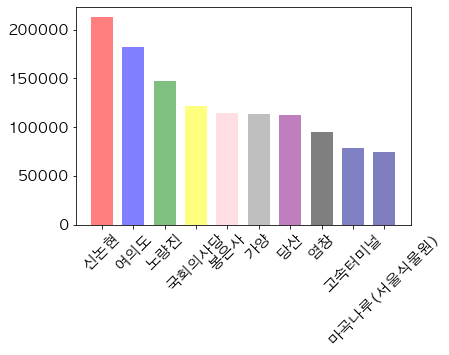

In [49]:
labels = ['신논현', '여의도', '노량진', '국회의사당', '봉은사', '가양', '당산', '염창', '고속터미널', '마곡나루(서울식물원)'] # 역명
values = [212461, 182035, 147337, 121631, 114538, 113525, 112119, 94976, 78397, 74396] # 승하차인원
colors = ['red', 'blue', 'green', 'yellow', 'pink', 'gray', 'purple', 'black', 'darkblue', 'navy']


bar = plt.bar(labels, values,color= colors, alpha = 0.5, width = 0.7)
plt.xticks(rotation = 45) # x 축의 이름 데이터 각도를 45도로 설정

    

plt.show()

